In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def doNothing(x):
    pass

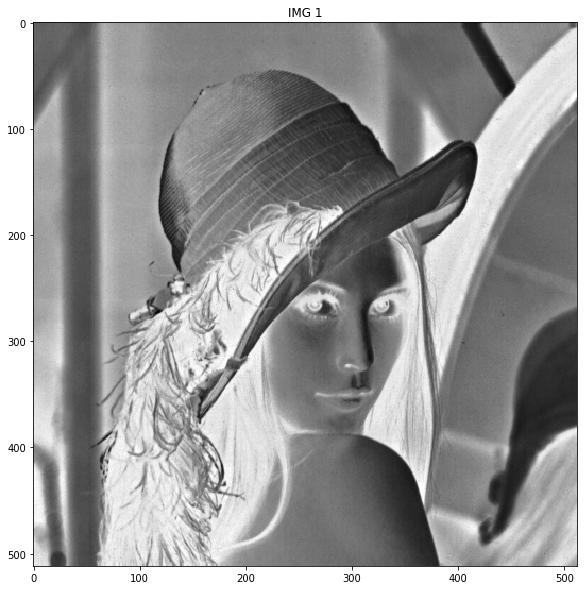

In [4]:
# Intensity Transformations - Part I

# Image negative
img = cv.imread('../img/Lenna.png', cv.IMREAD_GRAYSCALE)
with plt.rc_context(rc={'figure.figsize' : [10, 10]}): # Jupyter confs
    plt.title("IMG 1"), plt.imshow(255 - img, 'gray')
    plt.show()

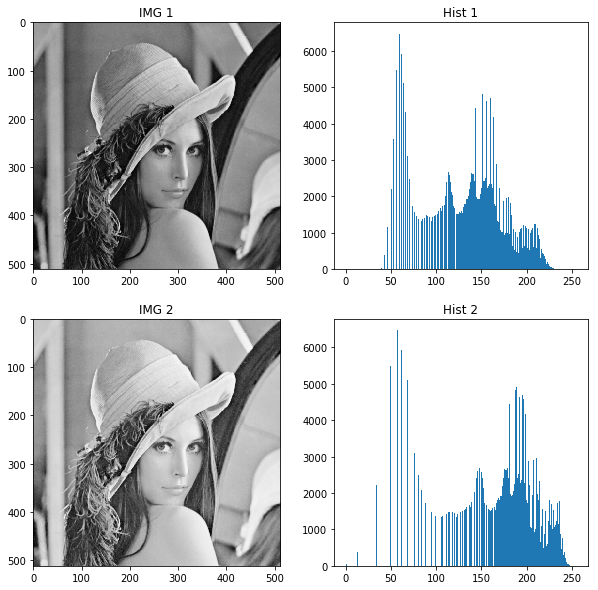

In [12]:
# Log transform
img = cv.imread('../img/Lenna.png', cv.IMREAD_GRAYSCALE)
img2 = np.ones(img.shape, np.float64)
c = 1
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        intensity = img[x][y]
        intensity_new = c * np.log(1 + intensity)
        img2[x][y] = intensity_new
        
cv.normalize(img2, img2, 255, 0, cv.NORM_MINMAX)

with plt.rc_context(rc={'figure.figsize' : [10, 10]}): # Jupyter confs
    plt.subplot(221), plt.title("IMG 1"), plt.imshow(img, 'gray')
    plt.subplot(222), plt.title("Hist 1"), plt.hist(img.ravel(), 256, [0, 255])
    plt.subplot(223), plt.title("IMG 2"), plt.imshow(img2, 'gray')
    plt.subplot(224), plt.title("Hist 2"), plt.hist(img2.ravel(), 256, [0, 255])
    plt.show()
    
# Usar Lenna.png como exemplo não mostra adequadamente o efeito da transformação.

In [ ]:
# Intensity transform
img = cv.imread('../img/Lenna.png', cv.IMREAD_GRAYSCALE)
img2 =  np.ones(img.shape, np.uint8)

cv.namedWindow('img', cv.WINDOW_KEEPRATIO)
cv.namedWindow('img2', cv.WINDOW_KEEPRATIO)

n = 0
cv.createTrackbar('n', 'img2', n, 100, doNothing)

while cv.waitKey(1) != ord('q'):
    
    n = cv.getTrackbarPos('n', 'img2')
    
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            intensity = img[x][y]
            intensity_new = np.power(intensity, n)
            img2[x][y] = intensity_new
            
    cv.imshow('img', img)
    cv.imshow('img2', img2)

cv.destroyAllWindows()

# Fica muito lento e pesadíssimo com opencv aqui (ver celula abaixo)

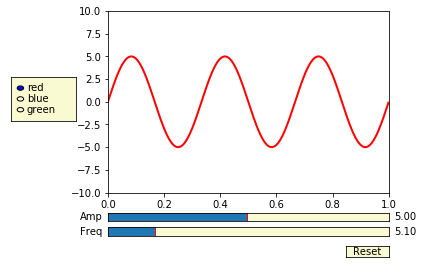

In [15]:
# Depois tento modificar o código abaixo para poder usar o exemplo acima
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp * np.sin(2 * np.pi * freq * t))
    fig.canvas.draw_idle()

sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    sfreq.reset()
    samp.reset()

button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)

def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
    
radio.on_clicked(colorfunc)

plt.show()